# Metoda Eulera

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

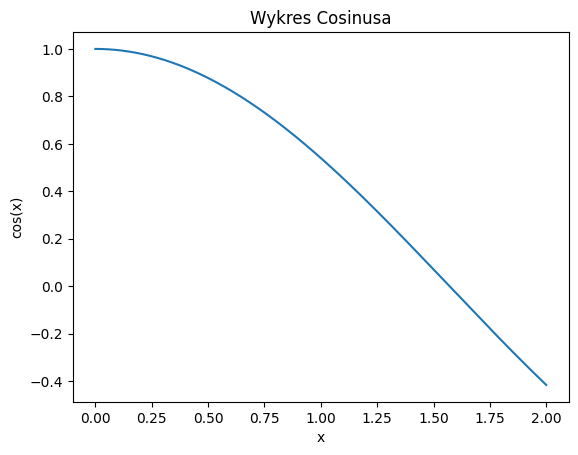

In [3]:
x = np.linspace(0,2,1000)
y = np.cos(x)
plt.title("Wykres Cosinusa")
plt.xlabel('x')
plt.ylabel('cos(x)')
plt.plot(x,y)

--------------------------------------------------
    N    |     h    |    Errmax    |  Err-end
--------------------------------------------------
   10    | 0.200000 | 3.76 x 10^-2 | 9.19 x 10^-4
   20    | 0.100000 | 1.79 x 10^-2 | 4.52 x 10^-6
   40    | 0.050000 | 8.73 x 10^-3 | 1.06 x 10^-4
   80    | 0.025000 | 4.32 x 10^-3 | 7.73 x 10^-5
  160    | 0.012500 | 2.15 x 10^-3 | 4.46 x 10^-5
  320    | 0.006250 | 1.07 x 10^-3 | 2.38 x 10^-5
  640    | 0.003125 | 5.34 x 10^-4 | 1.23 x 10^-5
  1280   | 0.001563 | 2.67 x 10^-4 | 6.22 x 10^-6
  2560   | 0.000781 | 1.33 x 10^-4 | 3.13 x 10^-6
  5120   | 0.000391 | 6.67 x 10^-5 | 1.57 x 10^-6
 10240   | 0.000195 | 3.34 x 10^-5 | 7.87 x 10^-7
 20480   | 0.000098 | 1.67 x 10^-5 | 3.94 x 10^-7
 40960   | 0.000049 | 8.34 x 10^-6 | 1.97 x 10^-7
 81920   | 0.000024 | 4.17 x 10^-6 | 9.85 x 10^-8
 163840  | 0.000012 | 2.08 x 10^-6 | 4.93 x 10^-8


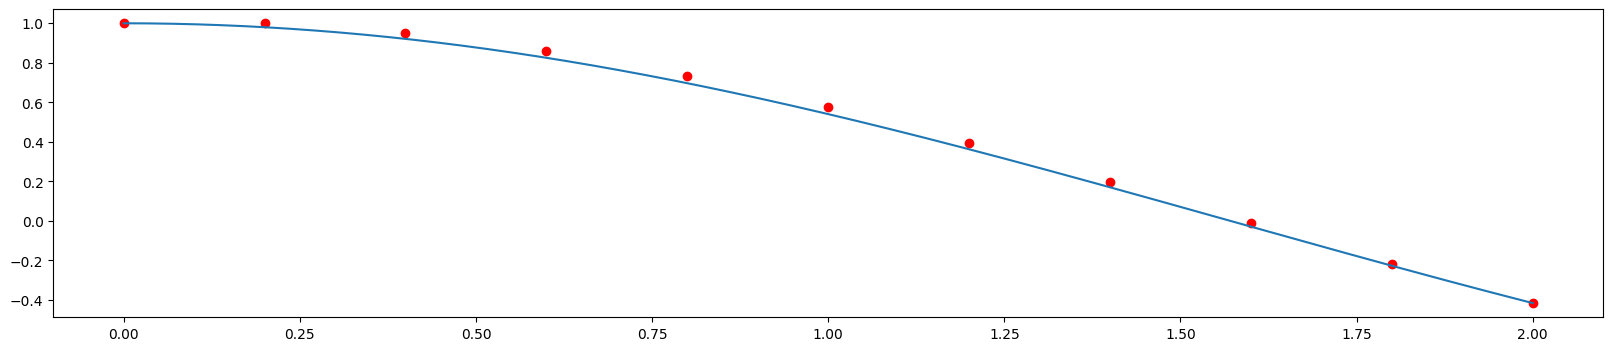

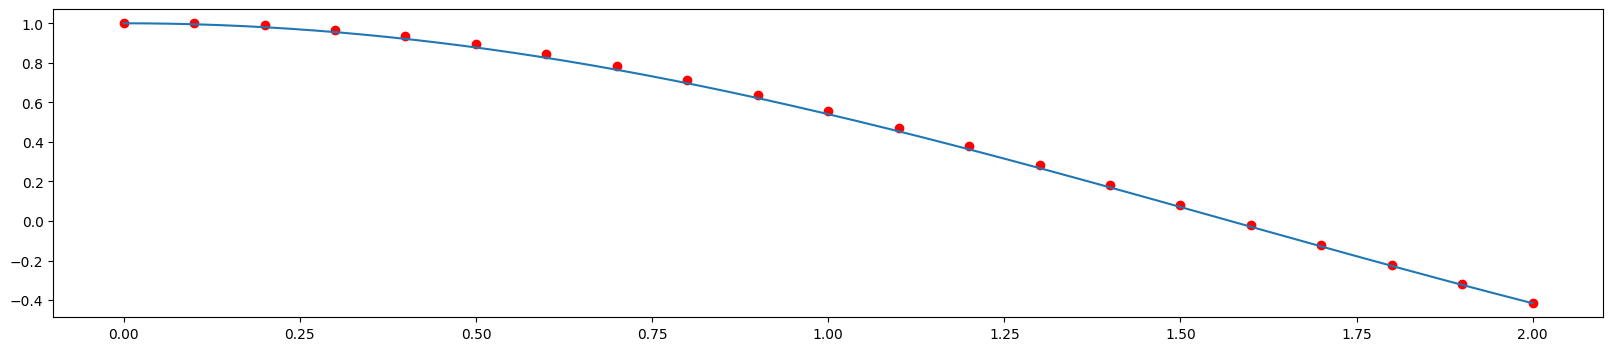

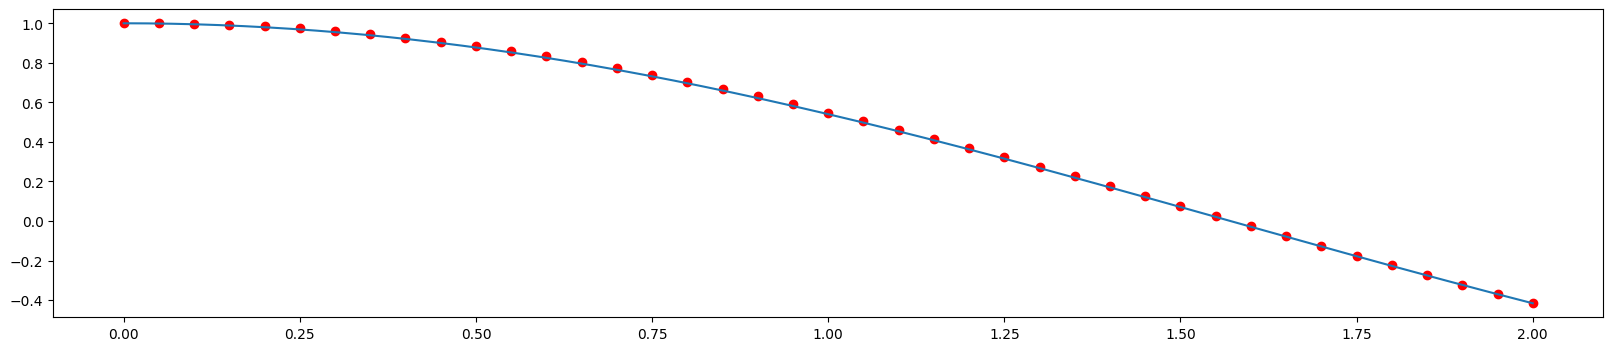

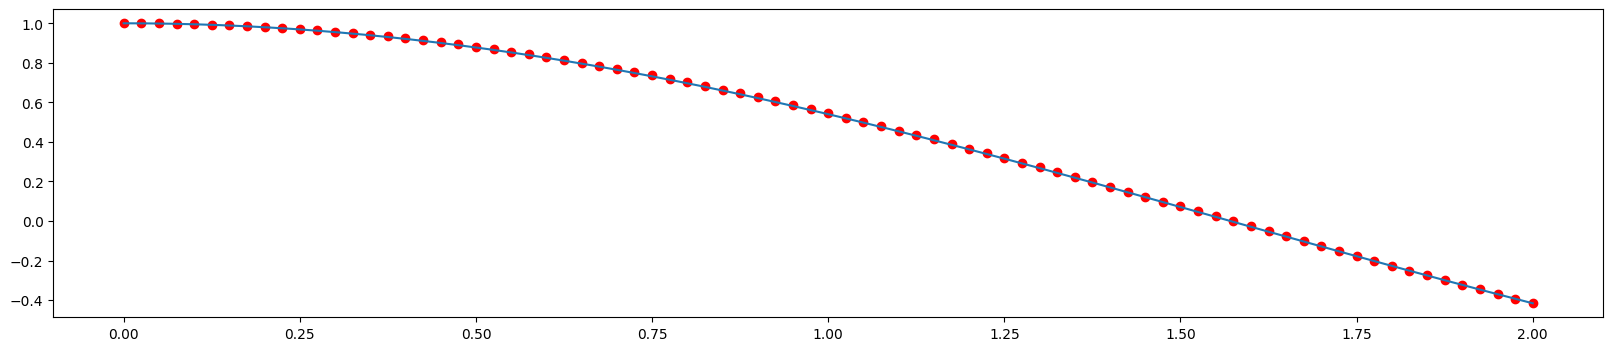

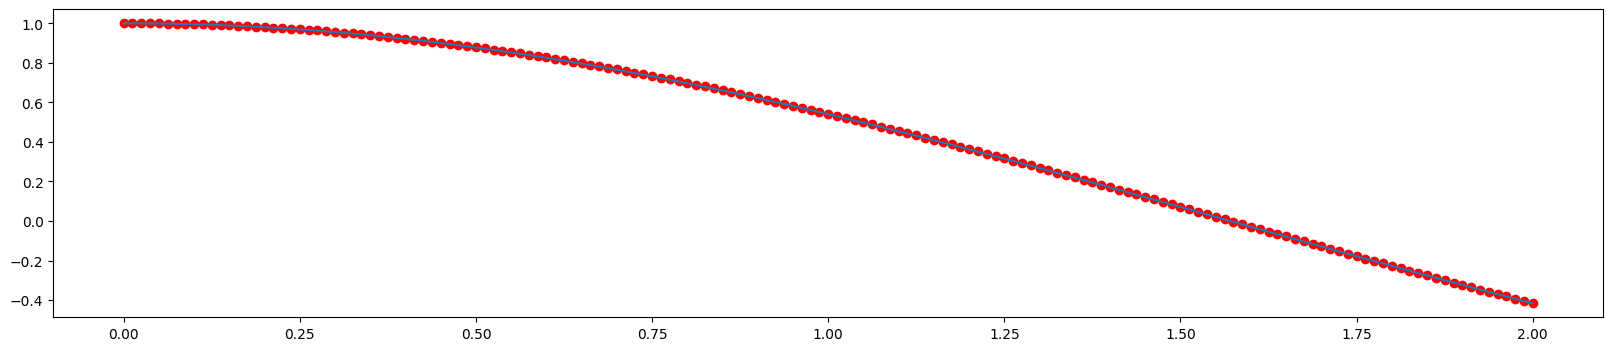

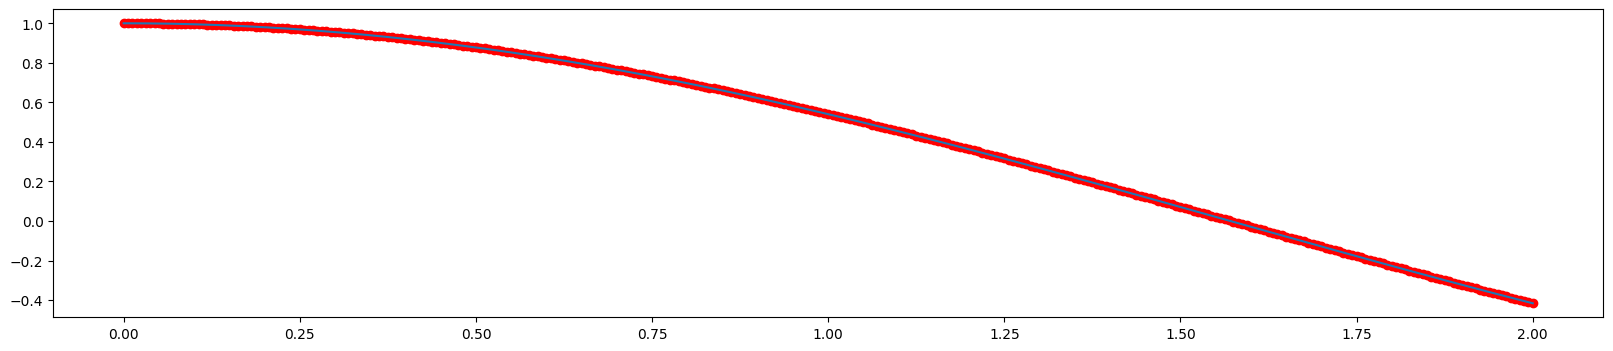

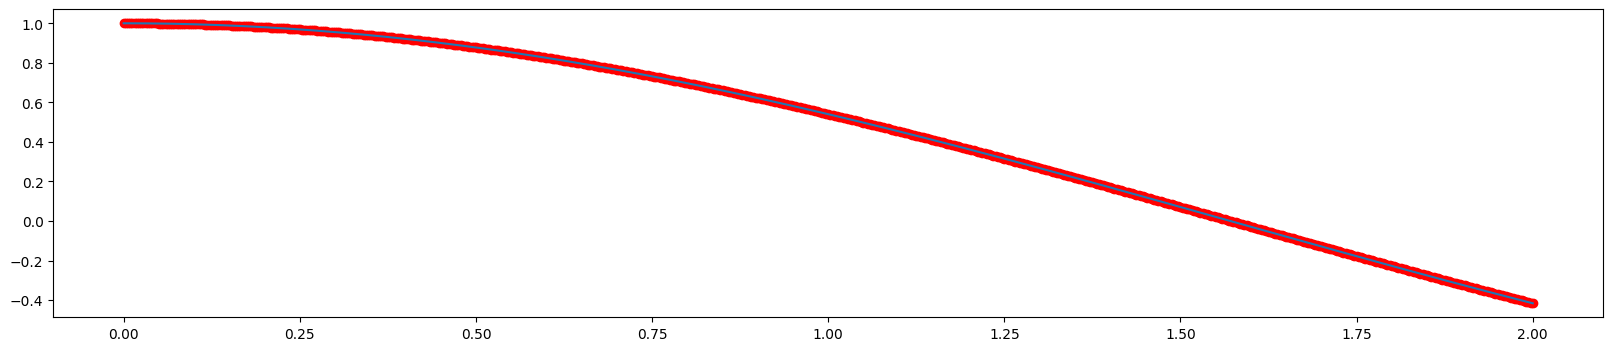

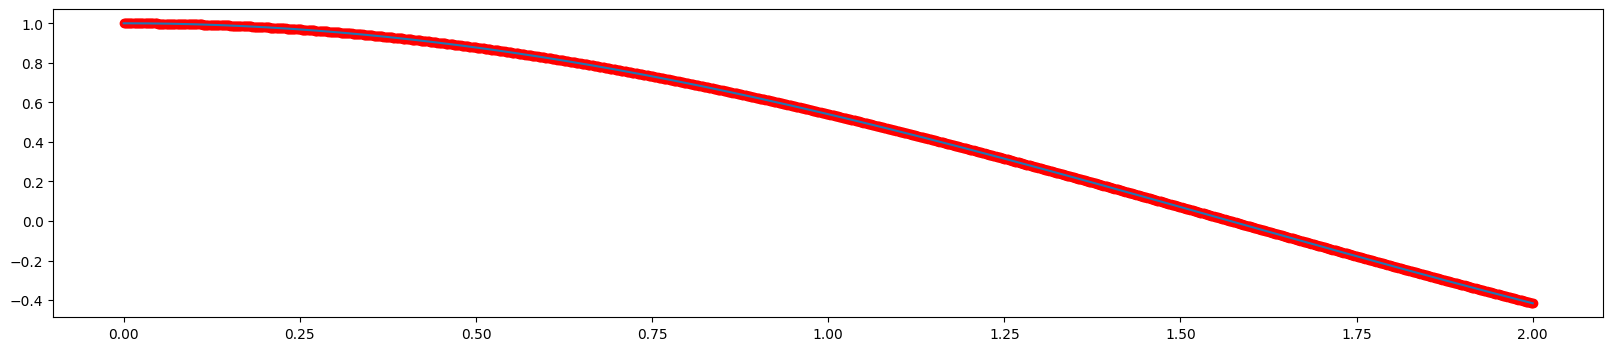

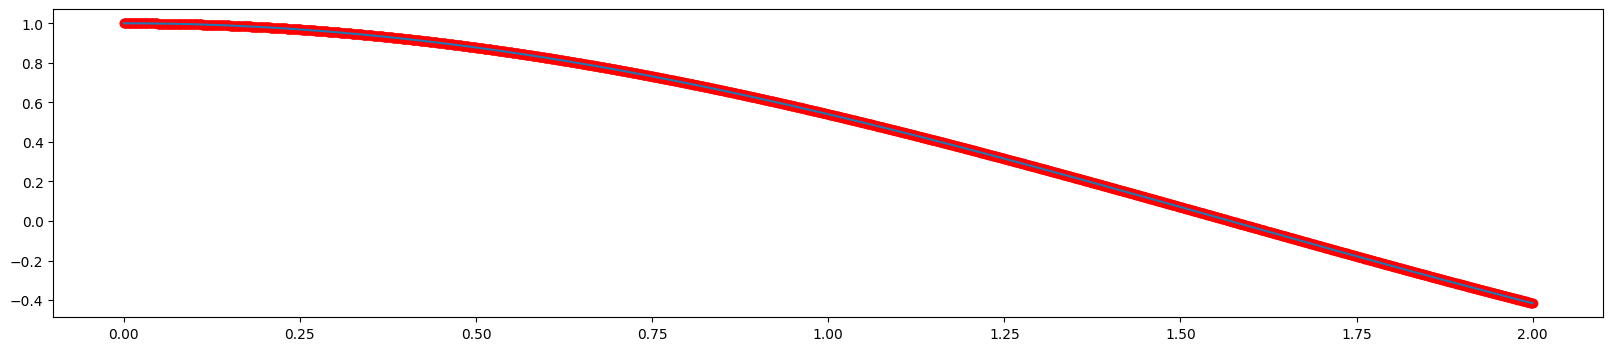

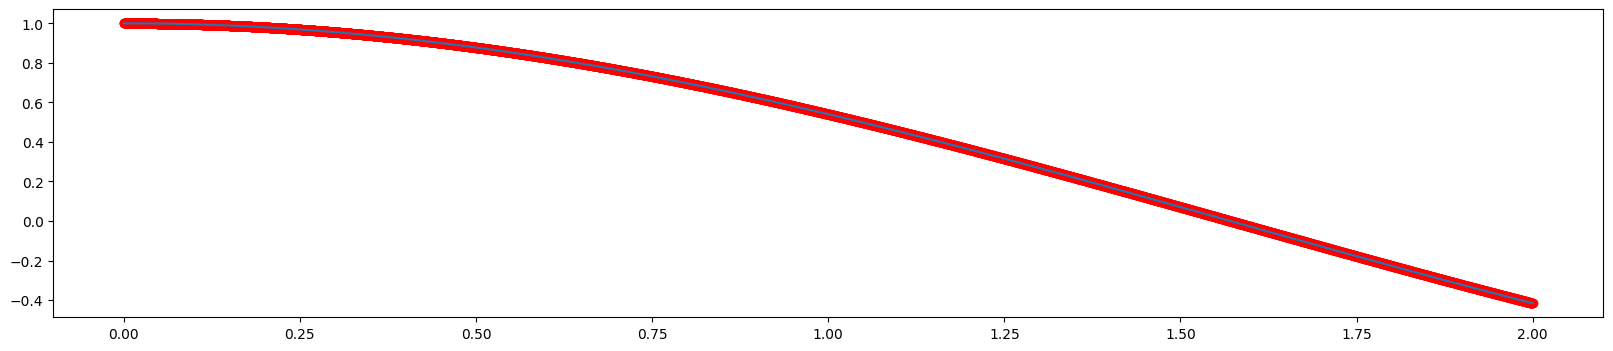

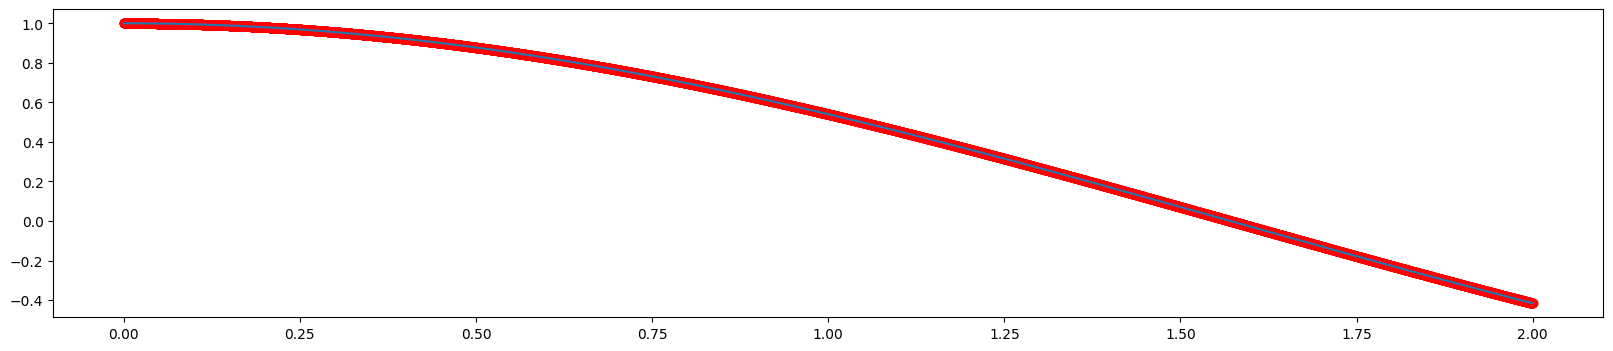

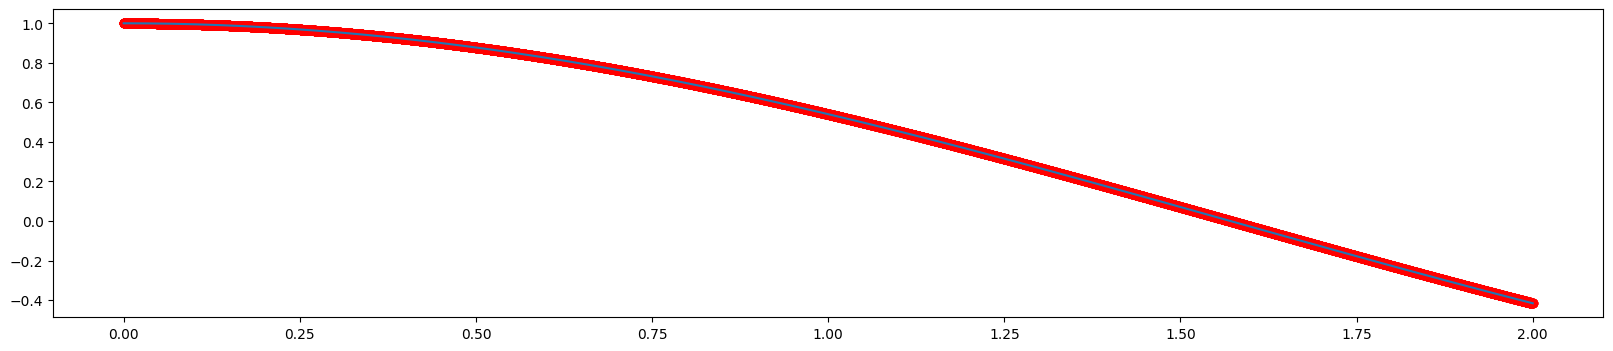

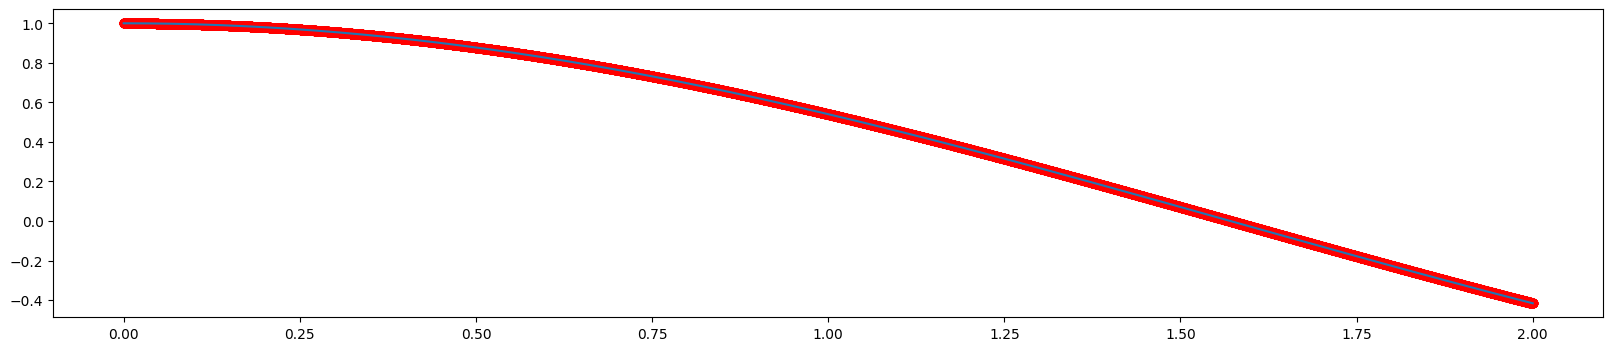

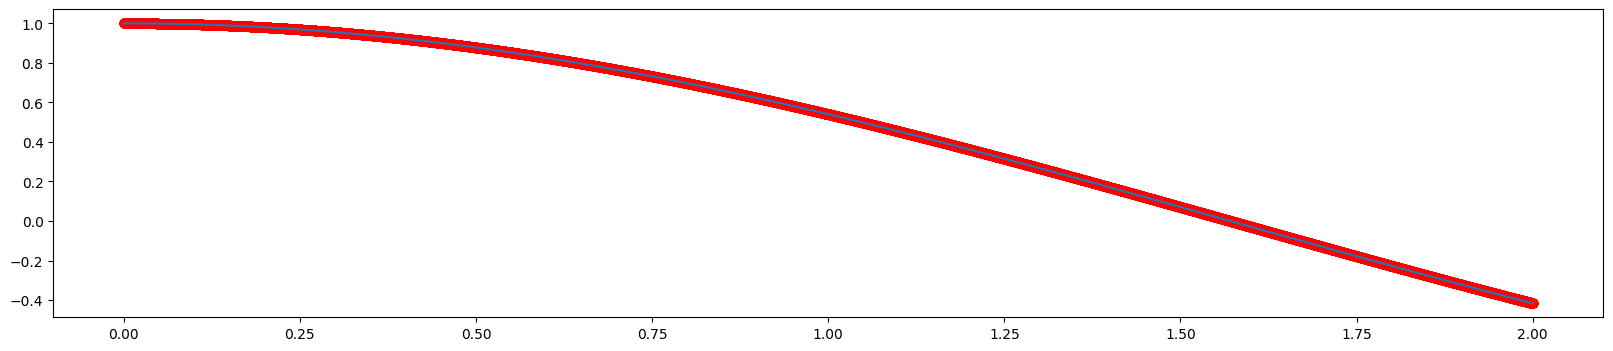

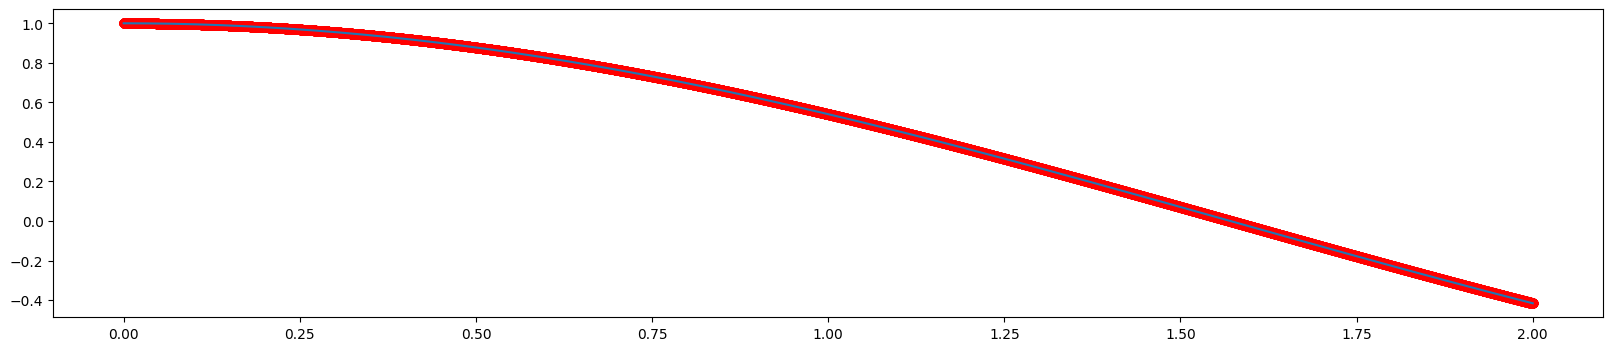

In [47]:
def x_prim(x, t, lam):
    return lam*(x-np.cos(t)) - np.sin(t)

T_0 = 0.0
KSI = 1.0
T = 2.0 # na ile części dzielimy przedział
X_0 = 1.0
LAM = -2.0

# DANE DLA COSINUSA
x = np.linspace(0,2,1000)
y = np.cos(x)
results = {"N": [], "h":[], "errmax":[], "error-end":[]}
errmax = []
N_values= []
error_end =[] 
h_values = []

def custom_scientific_format(x):
    if pd.isna(x) or x == 0:
        return str(x)
    exponent = int(np.floor(np.log10(abs(x))))
    coefficient = x / (10 ** exponent)
    if coefficient == int(coefficient):
        formatted_coefficient = f"{int(coefficient)}."
    else:
        formatted_coefficient = f"{coefficient:.2f}"
    return f"{formatted_coefficient} x 10^{exponent}"


lambda_vals = [-2,-10,-50, -100,-1000]
N = 5

for i in range(1,16):
    N = N *2
    h = (T- T_0)/N
    wezly = np.linspace(T_0, T, N+1)
    rozwiazania = np.zeros(N+1)
    blad = np.zeros(N+1)
    for i, wezel in enumerate(wezly):
        if i == 0:
            rozwiazania[i] = X_0
            continue
        rozwiazania[i] = rozwiazania[i-1]+ h*x_prim(rozwiazania[i-1], wezly[i-1], LAM)
        blad[i] = np.abs(rozwiazania[i] - np.cos(wezel))
    plt.figure(figsize=(20,4))
    plt.plot(x,y)
    plt.scatter(wezly,rozwiazania, color="red")
    blad2 = np.abs(np.cos(T) - rozwiazania[-1])
    errmax.append(np.max(blad))
    error_end.append(blad2)
    N_values.append(N)
    h_values.append(h)





print("-" *50)
print("    N    |     h    |    Errmax    |  Err-end")
print("-" *50)
for size, mse, acc, err in zip(N_values, h_values, errmax, error_end):
    print(f"{size:^8} | {mse:.6f} | {custom_scientific_format(acc)} | {custom_scientific_format(err)}")

-0.32755067825026796
-0.3500898857368395
-0.3460431627179772
-0.34727949737125785
-0.4447006762638339
-0.6218981542356694
-0.6930888374416555
-0.3893134417362454
-0.4142473080151987
-0.4164065852247445
-0.5540064644974096
-0.7972694291817506
-0.8970783333785204
-0.48105565312154486
-0.5171021765176786
-0.5218619995115725
-0.7052768951509791
-0.9958978426209764
-1.1048272895614053
-0.6290834984158789
-0.6812634241896709
-0.6922678706158036
-0.9357027917876293
-1.2493480099386045
-1.358307494433777
-0.8806710097206172
-0.9383083234343492
-0.9590620995699783
-1.1589199267799866
-1.2903858639577992
-1.3426545193162642
-1.1901578165989801
1000 1000
-0.32755067825026796
-5.732580682849123
-65.42900546772388
33258.08909089617
-2344645164.9618645
2.944271477724508e+19
-1.8542298648104848e+39
1.8415151712043115e+79
-7.253681301062412e+158
inf
-inf
nan
nan
nan
nan
nan
nan
nan
nan
nan
[nan nan]
-0.32755067825026796
-5.619592618518247
-62.738912119803636
28542.102856147692
-1742424758.1312342
1.50

C:\Users\makdeb\AppData\Local\Temp\ipykernel_7508\375043383.py:13: RuntimeWarning: overflow encountered in scalar multiply
  dy2_dt = ((1 - y1**2) * y2 - y1)/epsilon
C:\Users\makdeb\AppData\Local\Temp\ipykernel_7508\375043383.py:13: RuntimeWarning: overflow encountered in scalar power
  dy2_dt = ((1 - y1**2) * y2 - y1)/epsilon
C:\Users\makdeb\AppData\Local\Temp\ipykernel_7508\375043383.py:52: RuntimeWarning: invalid value encountered in add
  rozwiazania[:, i] = rozwiazania[:, i-1] + h * van_der_pol_prim(rozwiazania[:, i-1], wezly[i-1], epsilon)
C:\Users\makdeb\AppData\Local\Temp\ipykernel_7508\375043383.py:13: RuntimeWarning: overflow encountered in scalar divide
  dy2_dt = ((1 - y1**2) * y2 - y1)/epsilon


-0.32755067825026796
-5.510674538134262
-60.14155595568673
24520.095514682296
-1297441925.9215446
7.728709394673767e+18
-1.3037230715911173e+38
7.804310103313572e+76
-1.3293533405996997e+154
inf
-inf
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


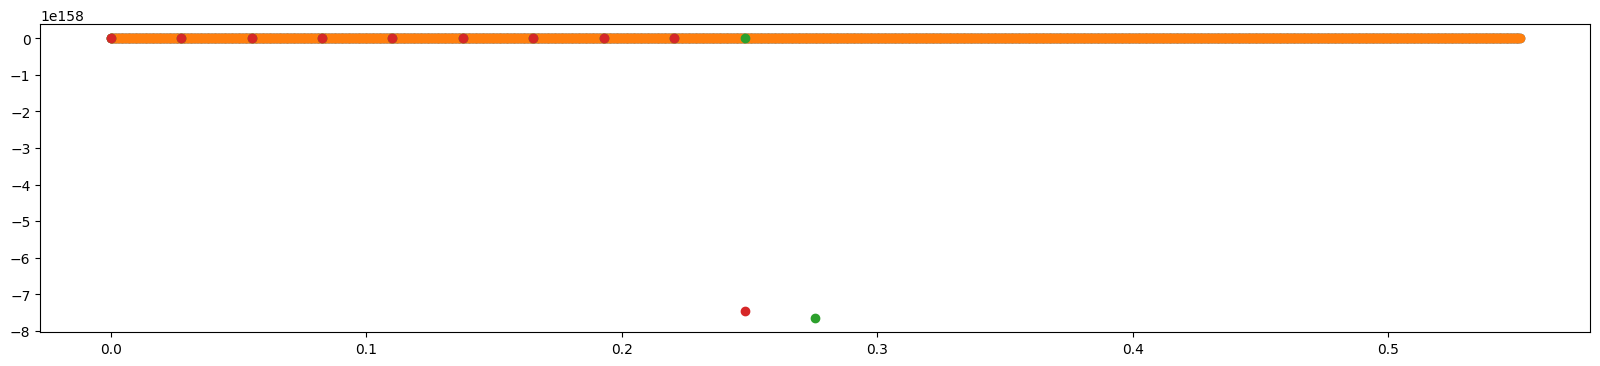

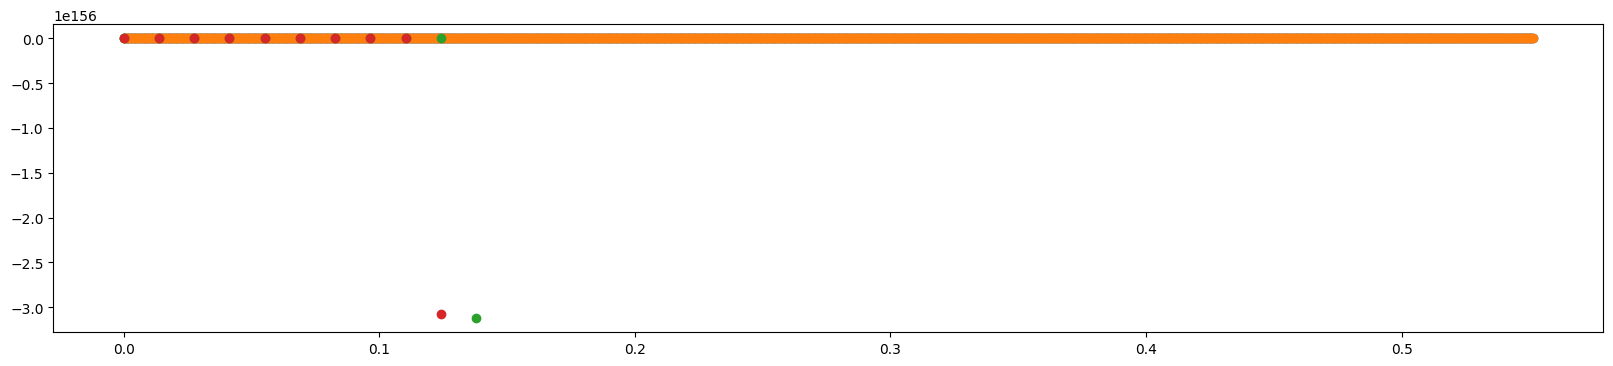

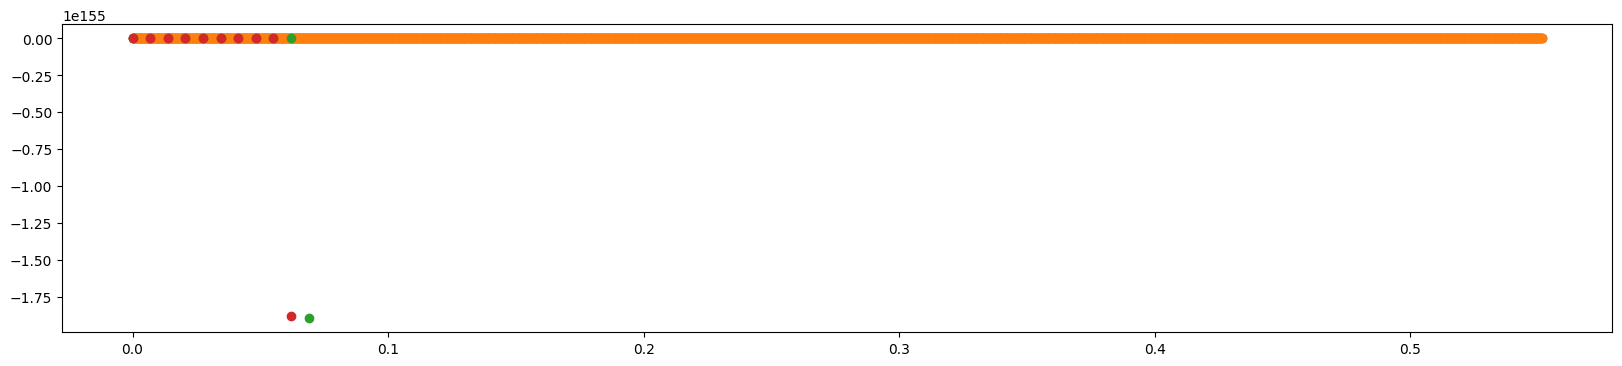

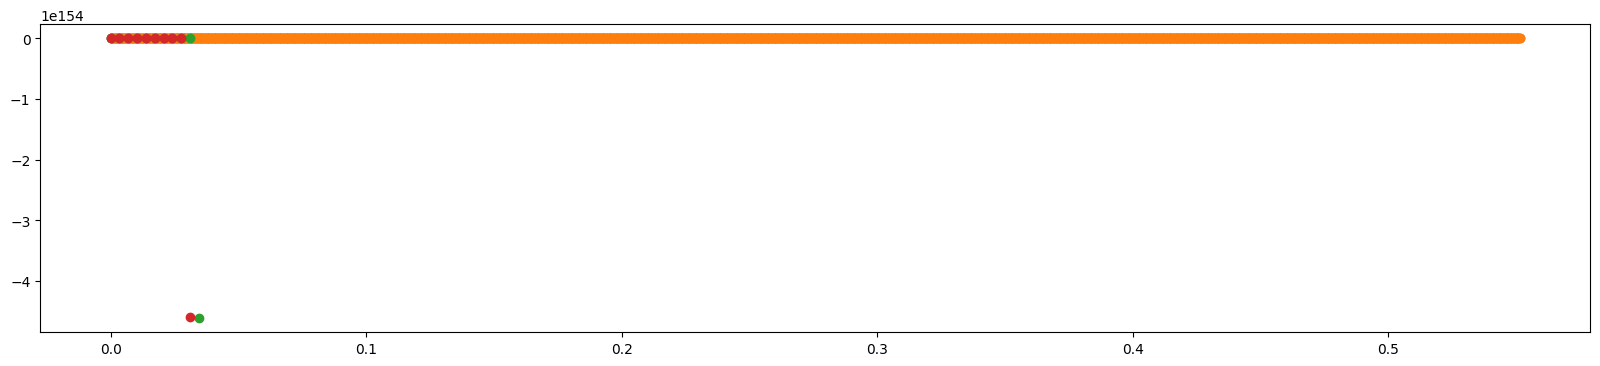

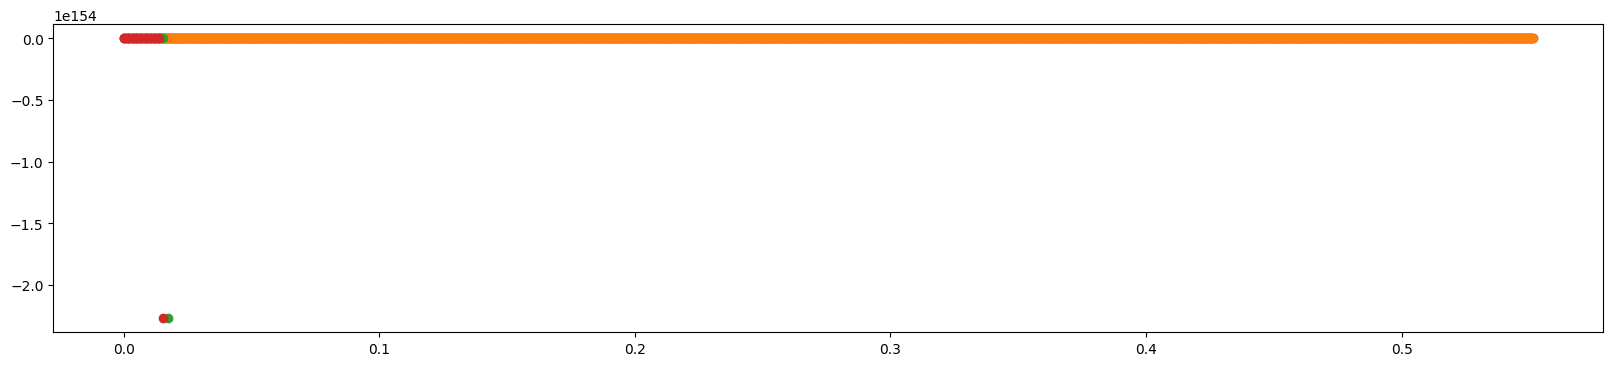

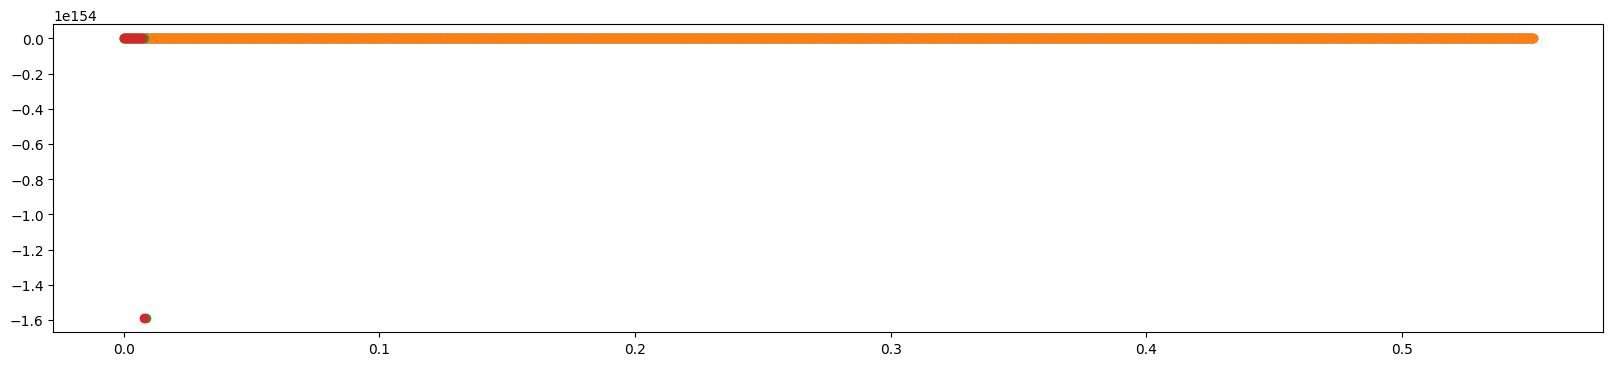

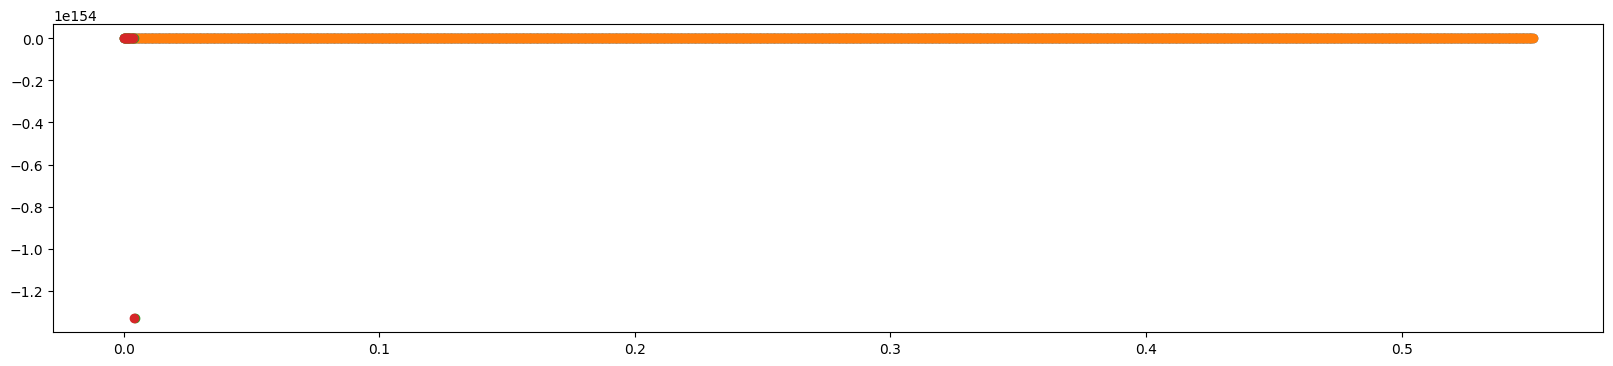

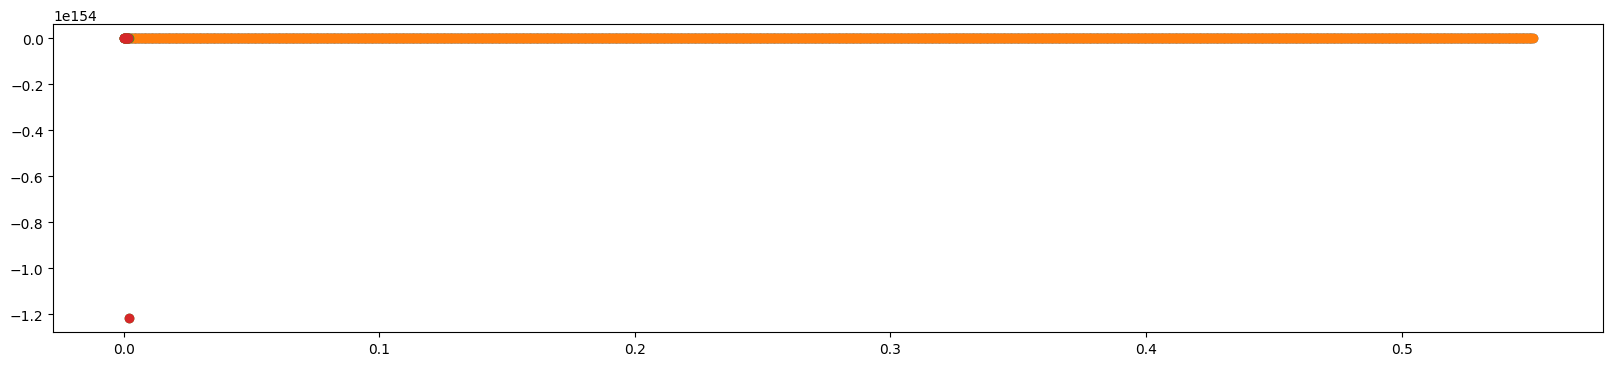

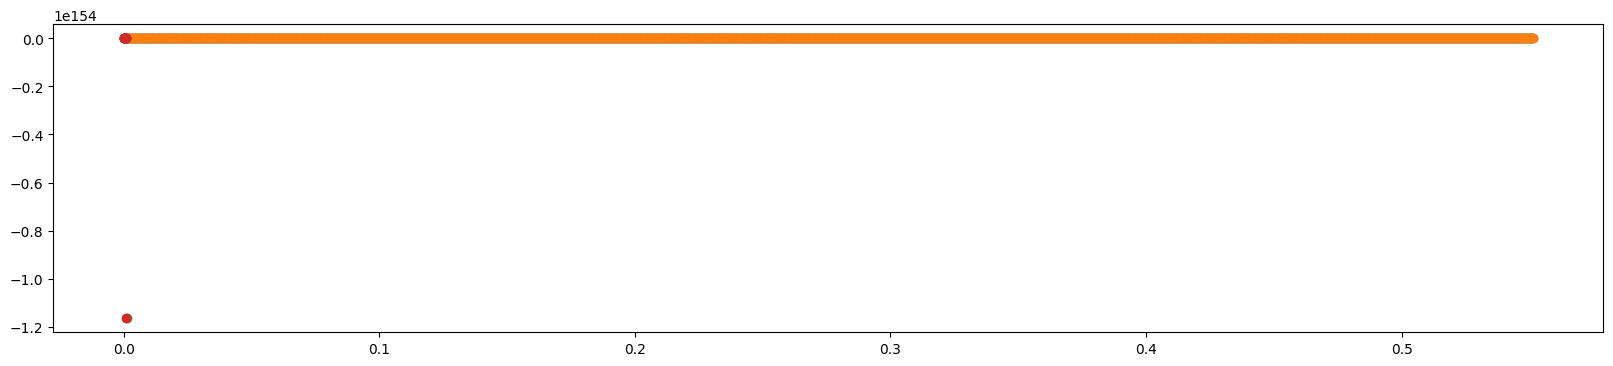

In [ ]:
from scipy.integrate import solve_ivp
from tabulate import tabulate


def van_der_pol_prim(y, t, epsilon):
    """
    Układ równań (oscylator) Van der Pola
    y'₁ = y₂
    y'₂ = ((1-y₁²)y₂ - y₁)/ε
    """
    y1, y2 = y
    dy1_dt = y2
    dy2_dt = ((1 - y1**2) * y2 - y1)/epsilon
    return np.array([dy1_dt, dy2_dt])



# Parametry
T_0 = 0.0
T = 0.55139  # przedział czasowy
epsilon = 1e-1  # parametr "łatwy"
 
# Warunek początkowy
y1_0 = 2.0
y2_0 = -2/3 + (10/81)*epsilon - (292/2187)*(epsilon**2) - (1814/19683)*(epsilon**3)
Y_0 = np.array([y1_0, y2_0])
 
# Rozwiązanie referencyjne
t_ref = np.linspace(T_0, T, 1000)
sol_ref = solve_ivp(lambda t, y: van_der_pol_prim(y, t, epsilon),
                       [T_0, T], Y_0, method='RK45', t_eval=t_ref).y
print(len(t_ref), len(sol_ref[0, :]))
y_ref = sol_ref[:, -1]


results = {
    "N": [],
    "h": [],
    "err(N) = |Y_N - Y_ref|": [],
    "err y₁": [],
    "err y₂": []
}
 
def rozwiazanie_euler(N):
    h = (T - T_0) / N + 1
    wezly = np.linspace(T_0, T, N+1)
    rozwiazania = np.zeros((2, N+1))
    rozwiazania[:, 0] = Y_0
    
    for i in range(1, N+1):
        rozwiazania[:, i] = rozwiazania[:, i-1] + h * van_der_pol_prim(rozwiazania[:, i-1], wezly[i-1], epsilon)
    
    return rozwiazania, h, wezly
 
N = 10
for i in range(1, 10):
    N = N * 2

    rozwiazania, krok, wezly = rozwiazanie_euler(N)
    
    blad_norm = np.linalg.norm(rozwiazania[:, -1] - y_ref)
    print(rozwiazania[:, -1])
    blad_y1 = abs(rozwiazania[0, -1] - y_ref[0])
    blad_y2 = abs(rozwiazania[1, -1] - y_ref[1])
    
    results["N"].append(N)
    results["h"].append(krok)
    results["err(N) = |Y_N - Y_ref|"].append(blad_norm)
    results["err y₁"].append(blad_y1)
    results["err y₂"].append(blad_y2)
    plt.figure(figsize=(20,4))
    plt.scatter(t_ref, sol_ref[0, :])
    plt.scatter(t_ref, sol_ref[1, :])
    plt.scatter(wezly, rozwiazania[0])
    plt.scatter(wezly, rozwiazania[1])
 
 
# Utwórz DataFrame i sformatuj wyniki
results_df = pd.DataFrame(results)
for col in ['h', 'err(N) = |Y_N - Y_ref|', 'err y₁', 'err y₂']:
    results_df[col] = results_df[col].apply(custom_scientific_format)
 
# Wyświetl tabelę wyników
print("Metoda Eulera z polowieniem kroku dla oscylatora Van der Pola (ε = 0.1)")
print(f"Warunek początkowy: y₁(0) = {y1_0}, y₂(0) = {y2_0:.10f}")
print(f"Przedział: [{T_0}, {T}]")
print(tabulate(results_df, headers='keys', tablefmt='grid',
               numalign='center', stralign='center', showindex=False))
